In [1]:
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

This data was gathered with something like:


```

(ns clojush.core-bench
  (:require [libra.bench :refer :all]

            [clojush.pushgp.record :as r]

            [clojush.core :refer [-main]]
            [clojush.test.core-test :refer [reset-globals!]]))
(defn call-main [args log]
  (reset-globals!)
  (let [new-gen r/new-generation!
        gen-start (atom nil)
        run-start (atom nil)]
    (with-redefs [r/new-generation!
                    (fn [i]
                      (println i)
                      (swap! gen-start
                        (fn [start-time]
                          (println start-time)
                          (when start-time
                            (let [gen-time (/ (- (System/nanoTime) start-time) 1e9)]
                              (swap! run-start (fn [t] (+ t gen-time)))
                              (log {:i i :gen-time  gen-time})))
                          (System/nanoTime)))
                      (new-gen i))]
     (reset! run-start (System/nanoTime))
     (with-out-str (apply -main args))
     (log {:run-time (/ (- (System/nanoTime) @run-start) 1e9)}))))

(def configurations
  {:jan-13
    ["clojush.problems.software.replace-space-with-newline"
      ":autoconstructive" "true"
      ":autoconstructive-genome-instructions" ":uniform"
      ":autoconstructive-diversification-test" ":size-and-instruction"
      ":autoconstructive-si-children" "2"
      ":autoconstructive-integer-rand-enrichment" "10"
      ":autoconstructive-boolean-rand-enrichment" "10"
      ":max-points" "1600"
      ":final-report-simplifications" "0"
      ":report-simplifications" "0"
      ":max-genome-size-in-initial-program" "400"
      ":evalpush-limit" "1600"
      ":parent-selection" ":leaky-lexicase"
      ":autoconstructive-entropy" "0.1"]
   :nth-prime
    ["clojush.problems.integer-regression.nth-prime"
     ":final-report-simplifications" "0"
     ":report-simplifications" "0"]})

(defn args [n]
  (concat (:jan-13 configurations) [":max-generations" (str n)]))

(defn measure- [n]
  (-> n
    args
    (call-main println)))
```

To find the length of a 0 generation run

In [7]:
t = """
41.049170008000004
41.220748731
41.542350940000006
41.021846489000005
41.201517332
41.300842180000004
41.611043791
41.116730187
41.438591642000006
40.859946109
40.770278001
41.201537489
41.234770224
41.758595759
41.114275128
41.359215483
41.369256313
41.202917802
41.533116766
41.738991481
41.572901687000005
41.291727683000005
41.352184085000005
41.502549899
41.203476388000006
41.119946259
40.954582265
41.095228459000005
40.802975117
41.341767063000006
40.840996854000004
41.308137598
40.980297939
40.798979232
40.668052727
40.654498674
41.214825295000004
40.86682793
41.485474773
41.227156244
41.446106004
41.143093743
41.286861286000004
41.208442102
41.176546531
40.982570506
41.155676684
41.562379635
41.336710944000004
40.971818626
40.922202053
41.114283548
41.320964897
40.857991694000006
41.156759698
41.222197521000005
40.899766854
41.173289956000005
41.039575939
41.265768313
41.022862599
40.953527741
41.083830009
41.044689005
41.191549495000004
41.093183466
41.044315287
41.269409917000004
41.09434666
41.575963698
41.575788964000004
41.281591878
40.988466302
41.102607137
41.323289171000006
41.289937587000004
41.496877271
41.077875388
41.366789768000004
41.209499075000004
41.2494275
41.164419362000004
41.387935903000006
40.998430170000006
41.08022159
41.179990794000005
41.075028086
41.220340768
41.105985874000005
40.948285114
41.022065973000004
41.127752686
41.056928156000005
41.356303716
41.096835359
41.186606458
41.166383221000004
41.008448296000005
41.017690358
41.657374025
41.630135529
40.968128384
41.232803853
41.610078816000005
40.933950319000004
41.152024094000005
41.172836689
41.48317496
41.258782589
41.206695235000005
41.022670312
41.082648715000005
41.095997774000004
41.087043964
40.628841304000005
41.108281361
40.88971337
40.843648581000004
41.137404346000004
41.092112124
41.119535908
40.840795038
40.986667991000004
40.916427748000004
40.926359947
41.129674866
40.971012081000005
41.4174013
40.549390906
41.94362514
41.332589167
41.086533228
41.156149091
41.428625094000004
41.273688057
41.478933615
41.373257694
41.691622988000006
41.612768249000005
41.736267089
41.410356946
41.454849828
41.602873177
41.108160610000006
40.724126423
41.122126375
40.91930287
41.247816616
40.68624912
41.112729898000005
40.833787888
41.119745264
41.275249949
40.89483964
40.967678355000004
40.894533387
41.179691122
41.07495379
41.148714955
40.96764885
41.382435475
40.848076533000004
40.990455365
41.226244461
41.577676725
41.120345723
41.157351875
41.063131258000006
41.041863479
40.908058021
41.150208392
41.012309492
41.152762186000004
40.778386657000006
40.688162059
41.195366831
40.864812985
40.982444636000004
41.090859413000004
41.303967784
41.239196498000005
41.117990701000004
41.263431564
41.212774598
41.084139843
41.189995771
40.890960532
41.011773929
41.086188604
40.849580043
40.643162196000006
41.169006407000005
41.187834476
41.133635950000006
40.813131773
40.944830306
40.920899214
41.032270056
40.777460556
41.509398674
41.209969372
41.437700535000005
41.295805162
41.042293750000006
41.670269726
41.492522212000004
41.217892691
41.357563437
41.425353338
41.187528774
41.626575716000005
41.757217981000004
41.341663360000005
41.605534112
40.919827049000006
41.095077936
40.701723478000005
40.855774116
40.852772535
40.793504070000004
40.726268455
40.747334592
40.831454123
41.073622851
40.769163703000004
40.785619512000004
40.720863891
41.126482963
40.829555376
40.690555077
40.97243333
40.960766729
40.766811657000005
40.983140754000004
40.630977034000004
41.030765152
40.870140538
41.391825854000004
41.010438541
41.075415036
40.878358872
40.874434941000004
40.951994771
41.123774051000005
40.786682344
40.631401595
40.929482746000005
40.560988724000005
41.015510432
40.997374727
40.862589
40.657411391000004
40.806303376
41.219219521
40.986712340000004
40.854704909000006
40.810637776
40.900106801
40.62986982
41.015005442
41.026316939000004
40.932648582000006
40.923560587000004
41.23989404
41.052687149
40.932221441
40.989965316
41.034213268
40.851715742
40.926084892000006
41.08559047
40.756862938000005
40.958164996
41.322933968
41.151721465
40.92557567
41.115587802
41.223734445000005
40.935349016
40.932160118000006
41.073864286
40.970926397
41.11053314
41.631107526
41.354901889000004
41.284371411
41.235340319
40.990032849
41.253125775
41.127117914
41.091562585000005
41.203180376000006
41.264104811
41.324124714
41.364927802000004
41.047451782
41.247435152
41.365766934
41.357473424000005
40.892461033000004
40.983136008
41.214166892
41.044112802
40.954392939
41.100582143000004
41.217418251000005
41.445013609
41.234979215
41.477981740000004
41.148345419
41.518765912
41.26245041
41.207193341
41.147349237
41.159710696000005
42.157945832
41.559105387
41.618038729000006
41.487767707
41.771069468
41.640709215
41.773253418
41.509898335
41.489960675000006
41.391891044000005
41.884307043
41.614576777
41.659394611
41.64319631
41.527546509000004
41.712784174
41.629124468
41.676970102000006
41.764708261
41.791919941
41.820726162
41.526623666000006
41.464896032000006
41.579032397000006
41.519290085
41.672892034
41.787092627
41.130725136
40.712922288
41.072763314
41.220580654
40.854682938
41.049074274000006
40.754397941
41.065838958
40.916778124000004
40.907824006000006
41.103376718
41.140368769000005
41.22192617
40.746325914
41.131003512
41.15484637
41.123480523000005
40.943849575
40.800370235
41.284087354
40.949924748
40.989899388000005
40.888993289000005
41.050345968
41.174237099
41.123046561
40.818173686
41.003769404
41.007884337
41.268195804
40.613757389
40.92731375
40.899819952
41.069299920000006
41.137779513000005
40.972255656
41.255395589
40.973377994
40.978708693
40.928731486000004
41.185832505
41.049731355000006
41.078976285
40.98235957
40.802112117
40.863765318000006
41.123492852000005
41.3681409
41.101039671
40.862167426
41.178668842
41.235840515
40.869751644000004
40.789352425000004
41.185882822
40.962941933
40.987094598000006
40.915388089000004
40.891463309
40.927347031000004
40.88062402
41.096874517
41.063288882
40.904731629000004
41.340739648
41.152080698000006
41.062035343000005
41.004232290000004
40.964020276
41.092174001000004
40.942527018
40.983833595
41.045833162
40.866216388000005
40.828907664
41.131169599
41.168729223
40.86903963
41.252357001
41.046830469
41.219410219000004
41.130370689
41.382394007
41.43477842
41.275532414000004
41.310500787
41.107029566
40.890401438000005
40.787531353000006
40.970625642
40.906798907
41.238173378
41.127909066
41.469779924
41.515542047000004
41.073695656000005
40.972726099
41.133974547
41.400012377
40.767596525
41.04020526
41.089905762
41.07855893
41.279731993000006
40.95973472
40.978229555000006
40.955127358000006
41.088022952
41.175596818
41.367185965000004
41.158090958
41.024368519
41.302631932000004
41.14691568
41.192476657
41.258452344000005
41.072530524
41.358030652000004
41.170007477000006
41.142493697
41.308258763000005
41.108920003
41.063552861000005
41.062618689000004
40.957718745
41.052911197
40.949061527000005
41.491441851000005
41.180891471
41.604914829
41.142114521
41.031645345
40.923695556000006
41.247994011
40.950034286000005
40.938344181000005
41.188431634000004
41.186309555
41.101838640000004
41.120645828
41.31452233
41.226021723
41.636734642
41.080230002
41.136221906
41.171609668
40.960759199
40.985466964000004
40.942631288
41.275722236
41.099931137000006
41.27991037
41.064712108
40.969972046
40.913325043
41.105588901000004
41.222993333000005
41.6461774
"""

In [13]:
x = np.array(list(map(float, t.split())))
len(x)

500

We can see the data doesn't fit a skewnorm...

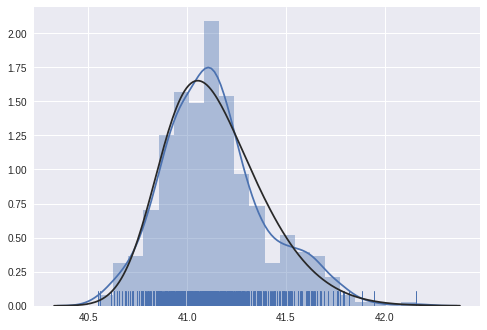

In [14]:
sns.distplot(x, fit=stats.skewnorm, rug=True)

And this is confirmed with a test

In [18]:
args = stats.skewnorm.fit(x)
stats.kstest(x, 'skewnorm', args=args)

KstestResult(statistic=0.039770907121140509, pvalue=0.40053611190192306)

Also doesn't fit a gamma

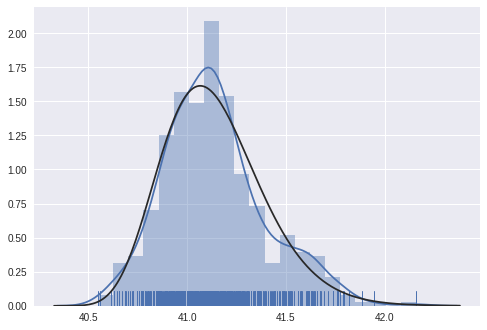

In [15]:
sns.distplot(x, fit=stats.gamma, rug=True)

In [31]:
alpha, beta, loc = stats.gamma.fit(x)
stats.kstest(x, 'gamma', args=[alpha, beta, loc]).pvalue

0.35226178080570048

In fact it looks multimodal! So fuck it... Not sure how many parameters we need. Let's do bayesian instead!

In [20]:
stats.bayes_mvs(x)

(Mean(statistic=41.138042141104002, minmax=(41.119108793553202, 41.156975488654801)),
 Variance(statistic=0.066267475203486553, minmax=(0.059656659917385974, 0.073482868740192442)),
 Std_dev(statistic=0.2572952414873832, minmax=(0.24424712878022939, 0.27107723759141494)))

Or maybe it would work with some? Let's try them all...

In [35]:
for d in stats._continuous_distns.__all__:
    print(d)
    fn = getattr(stats, d)
    try:
        ret = stats.kstest(x, d, args=fn.fit(x))
        if ret.pvalue > 0.8:
            print(ret)
    except Exception:
        pass

ksone


/opt/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:43: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


kstwobign
norm
alpha
anglit
arcsine
beta
betaprime
bradford
burr
burr12
fisk
cauchy
chi
chi2
cosine
dgamma
dweibull
expon
exponnorm
KstestResult(statistic=0.028044260351284489, pvalue=0.82651486091203474)
exponweib
exponpow
fatiguelife
foldcauchy
f
foldnorm
frechet_r
weibull_min
frechet_l
weibull_max
genlogistic
KstestResult(statistic=0.027158237357654158, pvalue=0.85450337376840835)
genpareto
genexpon
genextreme
gamma
erlang


/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.5.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.333333333333332.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.25.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.083333333333332.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-inte

gengamma
genhalflogistic
gompertz
gumbel_r
gumbel_l
halfcauchy
halflogistic
halfnorm
hypsecant
gausshyper
invgamma
invgauss
invweibull
johnsonsb
johnsonsu
laplace
levy
levy_l
levy_stable
logistic
loggamma
loglaplace
lognorm
gilbrat
maxwell
mielke


/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.307514521778716.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.364101250339189.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.284544306691053.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.504579127145064.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distributio

KstestResult(statistic=0.027219494353368123, pvalue=0.85263093767957254)
kappa4
kappa3
nakagami
ncx2
ncf
t
nct
pareto
lomax
pearson3
powerlaw
powerlognorm
powernorm
rdist
rayleigh
reciprocal
rice
recipinvgauss
semicircular
skewnorm
trapz
triang
truncexpon
truncnorm
tukeylambda
uniform
vonmises
vonmises_line
wald
wrapcauchy
gennorm
halfgennorm
argus
ksone_gen


AttributeError: module 'scipy.stats' has no attribute 'ksone_gen'

OK so the ones it could be are: `exponnorm`, `genlogistic`, or `mielke`. Let's plot those

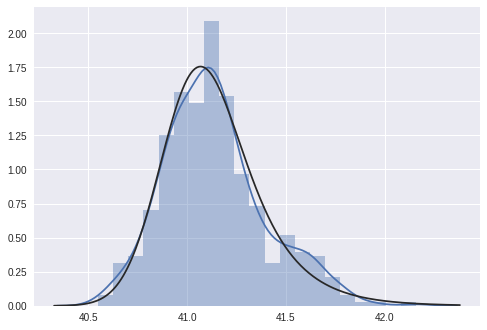

In [36]:
sns.distplot(x, fit=stats.exponnorm)

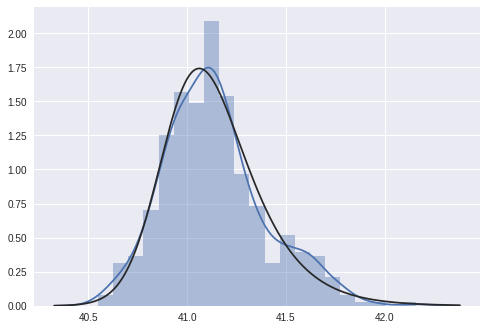

In [37]:
sns.distplot(x, fit=stats.genlogistic)

/opt/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/opt/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


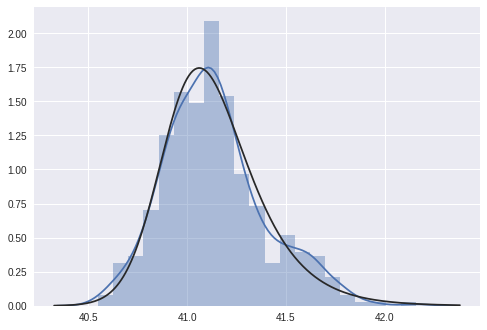

In [38]:
sns.distplot(x, fit=stats.mielke)

I mean it's still multimodal....